작성자 : YBigta 10기 박승리

# 8장 경사 하강법

대부분의 머신 러닝 기법은 주어진 상황에서 가장 적합한 모델을 찾아가는 과정으로 이루어져 있다.

가장 적합한 모델이란
- 모델의 오류(error)를 최소화 하는
- 또는 모델의 우도(likelihood)를 최대화하는

것을 의미한다.
 
우리가 여러 모델을 최적화 시킬 때, 문제를 해결하기 위하여 **경사 하강법(gradient descent)** 이라는 방법을 사용할 것이다.

이번장에서 우리는 **경사 하강법(gradient descent)**을 밑바닥에서부터 구현해 볼 것이다.

### Gradient란?

Gradient(경사, 기울기)는 벡터 미적분학에서 scaler field의 최대 증가율을 나타내는 vector field를 의미한다.

쉽게 말해, 함수가 **가장 빠르게 증가**할 수 있는 방향을 의미한다.

![rnn link](https://i.imgur.com/PxGH7qY.png)

따라서 함수의 최댓값을 구하는 방법으로 gradient를 활용할 수 있다. 

임의의 시작점을 잡은 후 gradient를 계산하고, gradient의 방향으로 조금씩 이동하는 과정을 여러 번 반복하는 것이다.

마찬가지로 함수의 최솟값은 gradient의 반대 방향으로 이동함으로써 구할 수 있다.

![rnn link](https://i.imgur.com/oj966PR.png)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math, random

### Gradient 계산하기

f가 변수가 하나인 함수인 경우, 점 x에서의 미분값은 미분의 정의에 따라 x가 아주 조금 변했을 때 f(x)의 변화량을 의미한다.

x의 변화량을 h로 표기하며, h를 0에 근사시켜 아주 조금 변한다는 것을 표현한다.

이 때의 미분값은 함수 변화율(difference quotient)의 극한값이다.

![rnn link](https://i.imgur.com/pZJZukj.png)

In [50]:
def difference_quotient(f, x, h):
    return((f(x + h) - f(x)) / h)

미분값을 구하기 위해서는 도함수(derivative)를 구해야 한다.

python으로는 극한값을 구할 수 없지만, 아주 작은 e값을 대입하여 근사시킨 값을 구할 수 있다.

f(x) = x^2 함수의 도함수를 구해보겠다.

In [53]:
def plot_esimated_derivative():
    
    def square(x):
        return x * x
    
    def derivative(x):
        return 2 * x
    
    derivative_estimate = lambda x : difference_quotient(square, x, h = 0.00000000001)
    
    # 두 계산식에 따른 결과값이 거의 비슷함을 보여주기 위한 그래프
    x = range(-10,10)
    
    plt.title("Actual Derivatives vs Estimates")
    plt.plot(x, list(map(derivative, x)), 'rx', label = 'Actual') # 빨간색 x
    plt.plot(x, list(map(derivative_estimate, x)), '+b', label = 'Estimate') # 파란색 +
    plt.legend(loc = 9)
    plt.show()

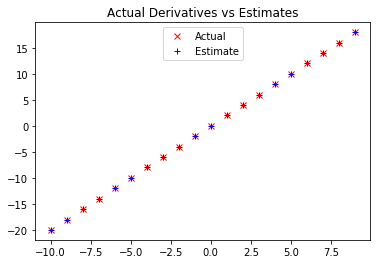

In [54]:
plot_esimated_derivative()

만약 f가 다변수 함수라면, 각각의 변수에 대해 작은 변화가 있을 때 f의 변화량을 알려주는 편도함수(partial derivative)가 여러 개 존재한다.

i번째 편도함수는, i번째 변수를 제외한 다른 모든 입력변수를 고정시켜서 계산할 수 있다.

In [55]:
def partial_diffrence_quotient(f, v, i, h):
    
    # 함수 f의 i번째 편도함수가 v에서 가지는 값
    w = [v_j + (h if j == i else 0)
            for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

하지만, 우리가 정의한 함수처럼 함수 두 값의 차이를 사용하여 근사하는 것은 계산해야 할 양이 많아진다는 단점이 있다.

만약 v의 길이가 n이면(변수의 개수) estimate_gradient 함수는 총 2n번의 계산을 수행해야 하므로, 불필요한 계산이 많아진다.

### Gradient 적용하기

함수 sum_of_square

image

함수 sum of square는 v가 0 벡터일 때 가장 작은 값을 가진다. 

우리는 경사 하강법을 이용하여 sum of square 3차원 벡터의 최솟값을 구하려고 한다.

임의의 시작점을 잡고, gradient가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동하면 구할 수 있다.

In [63]:
from collections import Counter
from scipy.spatial import distance
from functools import reduce

In [84]:
def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)

def step(v, direction, step_size):
    # v에서 step_size만큼 이동하기
    ls = []
    for v_i, direction_i in zip(v, direction): # zip함수는 동일한 개수로 이루어진 자료형을 묶어주는 역할을 한다.
        ls.append(v_i + step_size * direction_i)
    return(np.array(ls))

# sum_of_squares 함수의 도함수를 구해준다.
def sum_of_squares_gradient(v):
    return np.array([2 * v_i for v_i in v])

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [86]:
# 임의의 시작점을 선택한다
v = np.array([random.randint(-10,10) for i in range(3)])
tolerance = 0.000001 # 수렴값

while True:
    gradient = sum_of_squares_gradient(v)   # v의 gradient 계산
    next_v = step(v, gradient, -0.0001)     # gradient의 음수만큼 이동
    if dist(next_v, v) < tolerance:     # tolerance에 수렴하게 되면 멈춘다
        break
    v = next_v                              # 수렴할 때까지 반복

print("minimum v", v)
print("minimum value", sum_of_squares(v))

minimum v [-0.00422561  0.00084512 -0.00253537]
minimum value 2.49980817865e-05


### 적절한 step size 정하기

gradient를 따라 이동할 때, 어떤 step size가 최적의 결과를 낼 수 있는지 확인해야 한다.

방법은 다음과 같다.
- step size를 고정
- 시간에 따라 step size를 점차 줄임
- step을 거칠 때마다 목적 함수를 최소화하는 step size로 정함

step size에 여러가지 값을 할당해서, 그 중에서 어떤 step size가 가장 효과적인지 찾아보려고 한다.

In [ ]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

그런데 어떤 x는 함수에 부적합한 값을 넣어서 오류를 발생시킬 수 있다. 

따라서 safe라는 함수를 통해, f에 오류가 발생했을 때 무한대(infinity)를 반환하는 함수를 정의한다.

In [95]:
def safe(f):
    # f와 같은 함수를 반환하지만, f에 오류가 발생하면 무한대를 반환한다.
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # 무한대를 표기
    return safe_f

In [123]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    # 목적 함수(target_fn)을 최소화시키는 theta를 gradient descending을 사용해서 찾아준다.

    step_sizes = np.array([100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001])

    theta = theta_0 # theta를 시작점으로 설정한다.
    target_fn = safe(target_fn)
    value = target_fn(theta) # 최소화시키려는 값

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]

        # 함수를 최소화시키는 theta를 선택한다.
        # next_thetas에는 새롭게 gradient를 따라 이동한 x의 값들이 들어있다.
        # 다음 theta, 즉 next_theta에는 target_fn(next_steps)의 값 중 가장 작은(목적함수) 값을 선택한다.
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # 전 단계의 value와 이번 단계에서 새롭게 계산된 next_value의 값을 비교해, 그 차이가 tolerance만큼 수렴하면 멈춘다.
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [124]:
v = np.array([random.randint(-10, 10) for i in range(3)])
print(v)
v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)
print("minimum v", v)
print("minimum value", sum_of_squares(v))

[-6  6  1]
minimum v [-0.00099692  0.00099692  0.00016615]
minimum value 2.01530993326e-06


### Stochastic Gradient Descent (SGD)

앞에서 사용한 minimize_batch 함수는 이용하면 반복문을 한 번 돌 때마다 데이터 전체(모든 데이터 포인트, 모든 차원, 모든 변수)에 대한 gradient를 계산한다.

위에서 실습한 예제는 데이터 포인트의 개수가 3개로 시간이 많이 걸리지 않았지만, 차원이 증가하면 계산 시간이 아주 오래 걸릴것이다.

데이터 전체에 대한 오류값은 각각의 데이터 포인트에 대한 오류값들의 합과 같다.

따라서 반복문을 한 번 돌 때마다 데이터 포인트 하나에 대한 gradient를 계산하는 SGD를 사용할 수 있다.

한 번 반복문을 돌 때마다 임의의 순서대로 변수를 사용한다.

![rnn link](https://i.imgur.com/ZANr07V.png)

In [125]:
def in_random_order(data):
    # 임의의 순서대로 data를 반환한다.
    indexes = [i for i, _ in enumerate(data)] # data의 인덱스를 list로 생성
    random.shuffle(indexes) # index를 섞는다.
    for i in indexes:
        yield data[i] # 섞인 순서대로 index를 반환

SGD를 계산하면서, 함수값이 한동안 줄지 않으면 알고리즘을 종료하도록 한다.

In [126]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha = 0.01):
    # 데이터가 x, y 2개인 경우
    
    data = zip(x,y) # x = (3, 4, 5), y = (1, 5, 2)이면, zip(x,y) = ((3,1), (4,5), (5,2)) 
    theta = theta_0 # 처음 시작점
    alpha = alpha_0 # 기본 step_size
    min_theta, min_value = None, float('inf') # 시작할 때의 최솟값
    iterations_with_no_implovement = 0
    
    while iterations_with_no_implovement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # 새로운 최솟값을 찾았다면, 그 값을 저장하고
            # 처음 step size로 다시 돌아간다.
            min_theta, min_value = theta, value
            iterations_with_no_implovement = 0
            alpha = alpha_0
        else:
            # 최솟값이 줄어들지 않는다면, step size를 축소한다.
            iterations_with_no_implovement += 1
            alpha *= 0.9
            
        # 각 변수에 대해 경사도를 계산한다. 
        # 반복문을 사용하여, 각 데이터 포인트에 대한 gradient를 계산한다.(위의 Minibatch Gradient Descent와의 차이 비교)
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta